In [0]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
path='https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'
df = pd.read_csv(path)

df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [0]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x)
df['ppm_fixed'].fillna(method='backfill',inplace=True)

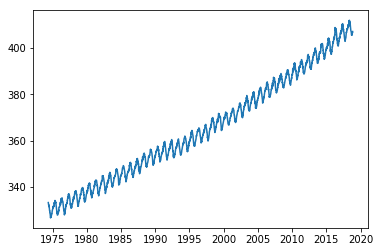

In [10]:
plt.plot(df.date, df.ppm_fixed);

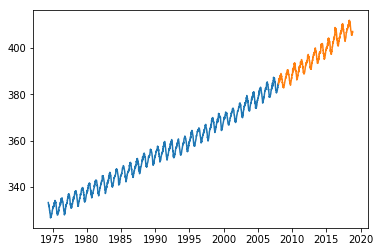

In [38]:
cut_year=2008
train =  df[df.year <cut_year]
test = df[df.year >=cut_year]

plt.plot(train.date , train.ppm_fixed, label='train')
plt.plot(test.date, test.ppm_fixed, label='test')

Prophet

In [39]:
fb_df = train[['date','ppm_fixed']].copy()
fb_df.columns = ['ds','y']

fb_df.head()

,ds,y
0,1974-05-19,333.34
1,1974-05-26,332.95
2,1974-06-02,332.32
3,1974-06-09,332.18
4,1974-06-16,332.37


In [40]:
m = Prophet()
m.fit(fb_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
future = m.make_future_dataframe(periods=len(test),freq='W',include_history=False)
future.tail()

,ds
561,2018-10-07
562,2018-10-14
563,2018-10-21
564,2018-10-28
565,2018-11-04


In [0]:
forecast = m.predict(future)

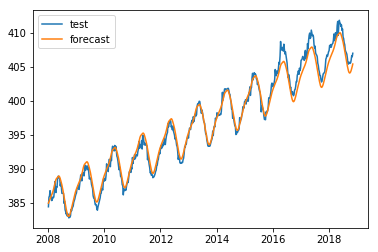

In [43]:
#plt.plot(train.date , train.ppm_fixed, label='train')
plt.plot(test.date, test.ppm_fixed, label='test')
plt.plot(test.date, forecast.yhat, label='forecast')


plt.legend();

#yhat

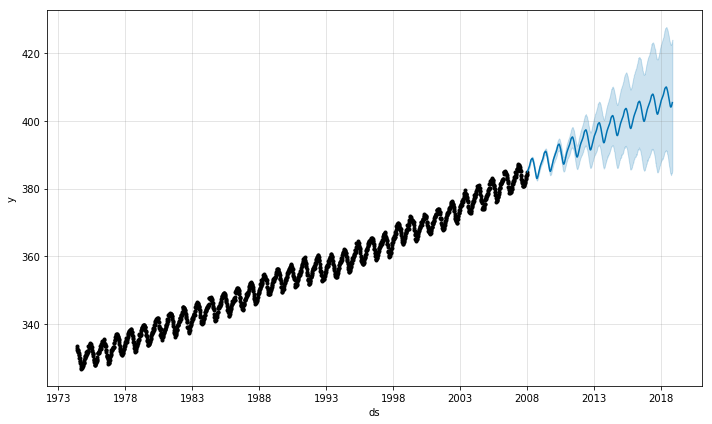

In [45]:
m.plot(forecast);